**Victoria_Wang_BrainStation_Capstone_Dec2024**

Part 3. Victoria_Wang_Capstone_01Ssubset_CV_TFIDF 

**1. Project Overview: Leveraging Sentiment Analysis and Similarity Search to Optimize Product offerings and success**

In the past decade, there is an exponential growth in online purchases and E-commerce platforms. Hence, E-commerce platforms are tasked with figuring out how customers feel about their brand, the services and product they offer. The relationship between customer sentiments and factors that influence them is valuable. Sentiment analysis allows for product-customer fit, which translates to sales and profit. According to the Statista Research Department, by 2029, the revenue in the E-commerce market in the US is estimated to reach 1.9 trillion dollars. So despite the fierce competition, there’s a lot of opportunities in the E-commerce market. We want to take advantage of these opportunities by extracting data driven insights via customer text reviews to iteratively improve product-customer fit.

According to a 2024 survey that focus on the most profit Amazon sellers worldwid by product category from December 2023 to January 2024, the beauty and personal care category topped the chart.

Hence, for this project, we will focus on the beauty and personal care category for analysis of the text reviews to predict customer sentiment and product success.

**Project Goal:**

Our problem statement is: **How might we… leverage user text reviews to identify product issues and prioritize features that customers value the most?**

My solution is to use machine learning and NLP to analyze customer sentiment and extract insights. This will result in a Review Analyzer App for various stakeholders to enhance customer-product fit and satisfaction with data-driven product insights.

Of note, given the limited computational power of my personal computer, I will subset the dataset to 1% (165674, 16) and utilize Google Colab for mapping text to 384-dimension embeddings via the Sentence Transformer model ('all-MiniLM-L6-v2').

**2. Table of Content:**
1. Project Overview
2. Table of Content
3. Data Source
4. Data Import Instructions
5. Importing relevant packages
6. EDA & Insights
7. Basic Time Series Analysis & Insights
8. Data is subsetted to 1% (165674, 16)
9. Text Analysis - Preprocessing using Sentence Transformer model ('all-MiniLM-L6-v2') for mapping text to 384-dimension embeddings and Modeling with Logistic Regression, XBoost and Random Forest
10. Text Analysis - Preprocessing using CountVectorizer and Modeling with Logistic Regression, XBoost and Random Forest
11. Text Analysis - Preprocessing using TFIDF with SVD and Modeling with Logistic Regression, XBoost and Random Forest
12. New Review Sentiment Predictor
13. Conclusions
14. Future Directions

**3. Data Source**

**Citation for the dataset UCSD Amazon Reviews' 23:**

@article{hou2024bridging,
  title={Bridging Language and Items for Retrieval and Recommendation},
  author={Hou, Yupeng and Li, Jiacheng and He, Zhankui and Yan, An and Chen, Xiusi and McAuley, Julian},
  journal={arXiv preprint arXiv:2403.03952},
  year={2024}
}

Dataset: https://amazon-reviews-2023.github.io/index.html#

**Citation for the Sentence Transformer Model ('all-MiniLM-L6-v2'):**

https://www.sbert.net/docs/package_reference/sentence_transformer/SentenceTransformer.html#sentence_transformers.SentenceTransformer.encode

**Citation for beauty and personal care category as the most profitable category:**

https://www.statista.com/statistics/1400287/amazon-most-profitable-sellers-category/#:~:text=A%202024%20survey%20found%20that,with%2027%20percent%20of%20sellers.)

**Citation for Statistia E-commerce Market Insights:**
https://www.statista.com/statistics/272391/us-retail-e-commerce-sales-forecast/

In [22]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from statsmodels.api import tsa # time series analysis

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from warnings import filterwarnings
filterwarnings(action='ignore')

**10. Text Analysis - Preprocessing using 1) CountVectorizer and Modeling with Logistic Regression, XBoost and Random Forest**

In [48]:
data_subset_CV = pd.read_csv('AmazonBP_all_selected_01subset.csv')

In [50]:
data_subset_CV.shape

(165674, 16)

In [52]:
data_subset_CV.head(5)

,user_id,rating,title_x,text,timestamp,verified_purchase,helpful_vote,parent_asin,average_rating,price,rating_number,time,year,month,week_of_year,sentiment
0,AHTDSFK3OHCOYISQCNCZ4O4AUYIA,3,Not worth the money,"When I received this product, I thought, oh my...",1650645000319,True,1,B09R3SGVGJ,4.4,23.25,588,2022-04-22 16:30:00.319,2022,4,16,1
1,AEW6PUQJFC4QRTW2CD6Q2G36ROVA,1,Wax warmer does not work,My wax warmer does not work. I have attempted ...,1632234980122,True,0,B07XFZ9NM4,4.3,37.99,8621,2021-09-21 14:36:20.122,2021,9,38,0
2,AFSSKZG4HMO376DH4LQXJNJ5SS3Q,5,Great for under makeup,Great for sensitive skin<br />A little goes a ...,1593525325984,True,0,B07NJ3RCBG,3.7,16.84,1806,2020-06-30 13:55:25.984,2020,6,27,1
3,AHQUS43KSFJURKZXKDWFUGPS5XBQ,5,Greatest Razor Ever,Just had the best shave of my life!,1584961480908,True,1,B07XB717WL,4.5,46.97,1325,2020-03-23 11:04:40.908,2020,3,13,1
4,AF6BBCDPTG7HDXEUAASOOUR7MD7A,5,PERFECT FOR LIP GLOSSES,This product is perfect for your lip glosses. ...,1414173265000,False,0,B097KW3S3K,4.8,18.49,1413,2014-10-24 17:54:25.000,2014,10,43,1


In [54]:
X2 = data_subset_CV[['user_id', 'rating', 'title_x', 'text', 'sentiment', 'timestamp', 'verified_purchase', 'helpful_vote', 'parent_asin', 'average_rating', 'price', 'rating_number', 'year', 'month', 'week_of_year']]
y2 = data_subset_CV['sentiment'] # target variable

In [56]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [58]:
X2_train.shape

(132539, 15)

In [60]:
y2_train.shape

(132539,)

In [62]:
X2_test.shape

(33135, 15)

In [64]:
y2_test.shape

(33135,)

In [66]:
# 1. Instantiate 
bagofwords_X2_train = CountVectorizer(max_features=500, min_df=1, stop_words='english')

# 2. Fit 
bagofwords_X2_train.fit(X2_train['text'])

# 3. Transform
X2_train_transformed = bagofwords_X2_train.transform(X2_train['text'])
X2_train_transformed

<132539x500 sparse matrix of type '<class 'numpy.int64'>'
	with 1122250 stored elements in Compressed Sparse Row format>

In [68]:
bagofwords_X2_train.get_feature_names_out()

array(['10', '100', '20', '30', '34', 'able', 'absolutely', 'acne',
       'actually', 'add', 'advertised', 'ago', 'amazing', 'amazon',
       'application', 'applied', 'apply', 'applying', 'area', 'arrived',
       'away', 'awesome', 'bad', 'bag', 'balm', 'bar', 'base', 'bath',
       'battery', 'beard', 'beautiful', 'beauty', 'believe', 'best',
       'better', 'big', 'bit', 'black', 'blade', 'blades', 'blonde',
       'blow', 'body', 'bottle', 'bottles', 'bought', 'box', 'br',
       'brand', 'brands', 'break', 'bristles', 'broke', 'broken', 'brown',
       'brush', 'brushes', 'burn', 'buy', 'buying', 'came', 'cap', 'care',
       'careful', 'case', 'cause', 'change', 'cheap', 'cheaper', 'clean',
       'clear', 'clippers', 'clips', 'close', 'coat', 'color', 'colors',
       'comb', 'come', 'comes', 'comfortable', 'company', 'completely',
       'compliments', 'conditioner', 'container', 'continue', 'cool',
       'cost', 'couldn', 'couple', 'cover', 'coverage', 'cream', 'curl',
   

In [70]:
X2_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [72]:
X2_train_transformed_df = pd.DataFrame(
    data=X2_train_transformed.toarray(),
    columns=bagofwords_X2_train.get_feature_names_out()
)
X2_train_transformed_df

,10,100,20,30,34,able,absolutely,acne,actually,add,...,wonderful,work,worked,working,works,worth,wouldn,wrong,year,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Transform X2_test
#using the bagofwords_X2_train because want test & train to be countvectorized into the same format for comparison

X2_test_transformed = bagofwords_X2_train.transform(X2_test['text'])
X2_test_transformed

<33135x500 sparse matrix of type '<class 'numpy.int64'>'
	with 278897 stored elements in Compressed Sparse Row format>

In [76]:
X2_test_transformed_df = pd.DataFrame(
    data=X2_test_transformed.toarray(),
    columns=bagofwords_X2_train.get_feature_names_out()
)
X2_test_transformed_df

,10,100,20,30,34,able,absolutely,acne,actually,add,...,wonderful,work,worked,working,works,worth,wouldn,wrong,year,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Notes on the names of the train, test set from CountVectorizer Preprocessing:**
1. X2_train_transformed, y2_train
2. X2_test_transformed, y2_test

In [79]:
from sklearn.linear_model import LogisticRegression

#Instantiate model
text_logreg_CV = LogisticRegression(C=0.5, penalty=None)

#Fitting the model 
text_logreg_CV.fit(X2_train_transformed, y2_train)

LogisticRegression(C=0.5, penalty=None)

In [81]:
#Score the model
print(f'Score on train: {text_logreg_CV.score(X2_train_transformed, y2_train)}')
print(f'Score on test: {text_logreg_CV.score(X2_test_transformed, y2_test)}')

Score on train: 0.8787073993315175
Score on test: 0.8731552738795835


The score on the training set is 87.87% accurarte, and the score for the testing set is 87.32%. Given that the score of both are very similar, it suggests that the training set is not likely to be overfitted.

In [102]:
#Get AUC score for Log Regression_CV:
from sklearn.metrics import roc_auc_score

# Assuming you have a trained model (text_logreg_CV) and test data (X_test, y_test)

# Get the predicted probabilities for the positive class
y2_pred_proba_logreg_CV= text_logreg_CV.predict_proba(X2_test_transformed)[:, 1]

# Calculate the AUC score
auc_score_logreg_CV = roc_auc_score(y2_test, y2_pred_proba_logreg_CV)

print("AUC Score Log Reg_CV:", auc_score_logreg_CV)


AUC Score Log Reg_CV: 0.8896741991943133


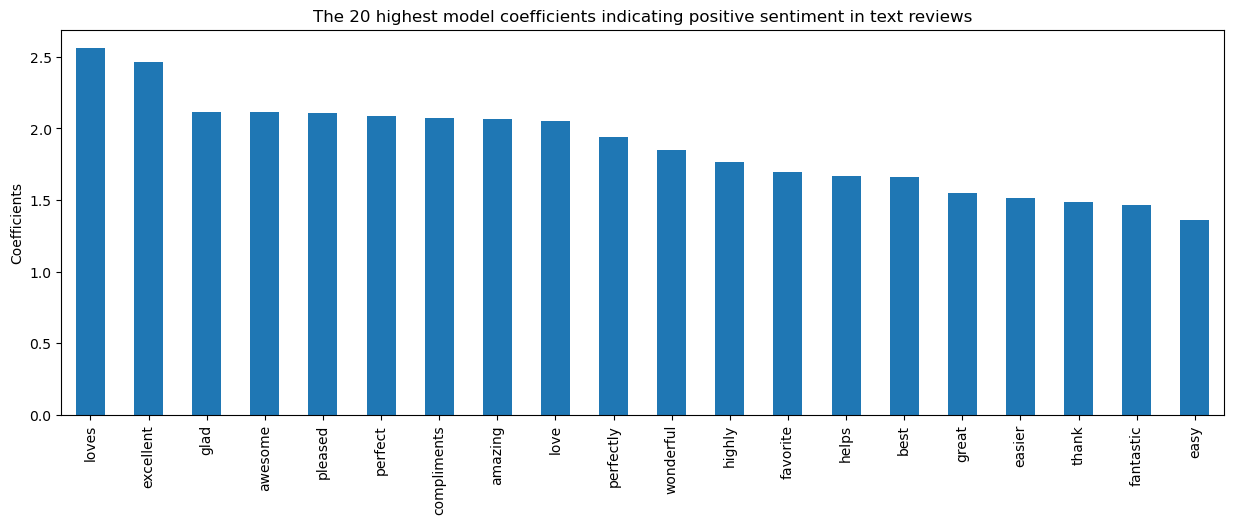

In [87]:
word_counts = pd.DataFrame(
    {"coefficients": text_logreg_CV.coef_[0]},
    index=bagofwords_X2_train.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment in text reviews")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

In [89]:
X2_train[(X2_train["text"].str.contains("excellent")) & (X2_train["verified_purchase"] == True)] #Assessing the reviews that contain excellent

,user_id,rating,title_x,text,sentiment,timestamp,verified_purchase,helpful_vote,parent_asin,average_rating,price,rating_number,year,month,week_of_year
148945,AH27VUQYOC7NQWCMWV7F3FMY75MQ,4,"Light, quick & easy.",Good dry shaving option at a solid price. May ...,1,1557105292895,True,0,B002TQ4AO0,4.2,26.37,6712,2019,5,19
81934,AGFZADKGNQIN43RSMTO3TRI64EDQ,5,High Quality Cream with a Wonderful Scent,Windsor could be summarized as a rich orange s...,1,1436838522000,True,2,B008724IEC,4.8,17.68,29,2015,7,29
140794,AFECX3SE4A4W77VBH6R5DGVHJQZQ,5,Simply the Absolute BEST Vitamin E Oil I have ...,I have used this oil for almost a year and it ...,1,1514056909927,True,101,B0BZXVZGF4,4.6,24.99,1985,2017,12,51
79007,AE2VFOQACL3FJM7EJYJWOEZZDWWQ,5,Five Stars,The price was excellent and they are not too e...,1,1514569789510,True,0,B01L01A6JM,4.7,7.99,9951,2017,12,52
118436,AHZSTN7PBIGHMOAGW4R3SSUFLE6Q,5,A Great Addition,An excellent addition to my other Holy Land su...,1,1468821641000,True,5,B00K6R6LD2,4.5,14.99,106,2016,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158768,AEYA3B6JFTC66AYYBBFLTHQHTDUQ,5,Great customer service,I’m giving this 5 stars because my package was...,1,1613939638459,True,0,B0BPDCS78Q,4.8,9.99,12257,2021,2,7
28699,AFTTCFTABRVMC4OGARFWBSXYZFOA,2,Bad batch?,"First, my jar arrived packed nice and snug, in...",0,1355767220000,True,1,B00025WYKC,4.6,14.99,961,2012,12,51
20309,AHVSJB2RLBXMQYE2YOJCDBMGBAYA,5,Excellent Electric Razor in All Regards,The Series 5 5018s replaces a woefully inadequ...,1,1657328756238,True,2,B0B9L55WTG,4.2,69.94,9266,2022,7,27
91412,AHDTH5BY2D6PU4QTDJJ2IIVTUR6Q,1,"Note to self, do not buy again","Great for the first use, but after a few, the ...",0,1659470888217,True,0,B09KD28156,4.4,8.99,1357,2022,8,31


In [91]:
filtered_pos_df = X2_train[(X2_train["text"].str.contains("excellent")) & (X2_train["verified_purchase"] == True)][["text", "verified_purchase"]]

In [93]:
filtered_pos_df.head(20) #get insights on what is being said positively about the products

,text,verified_purchase
148945,Good dry shaving option at a solid price. May ...,True
81934,Windsor could be summarized as a rich orange s...,True
140794,I have used this oil for almost a year and it ...,True
79007,The price was excellent and they are not too e...,True
118436,An excellent addition to my other Holy Land su...,True
147460,Excellent set for daily use/professional setti...,True
105875,This are cute and it works well. I bought it t...,True
138695,The band is excellent no discomfort at all! Lo...,True
78844,It's a good product and works well - Aveeno is...,True
17095,I like the LWBTOSEE 2pc Nail Ombre Brush Nail ...,True


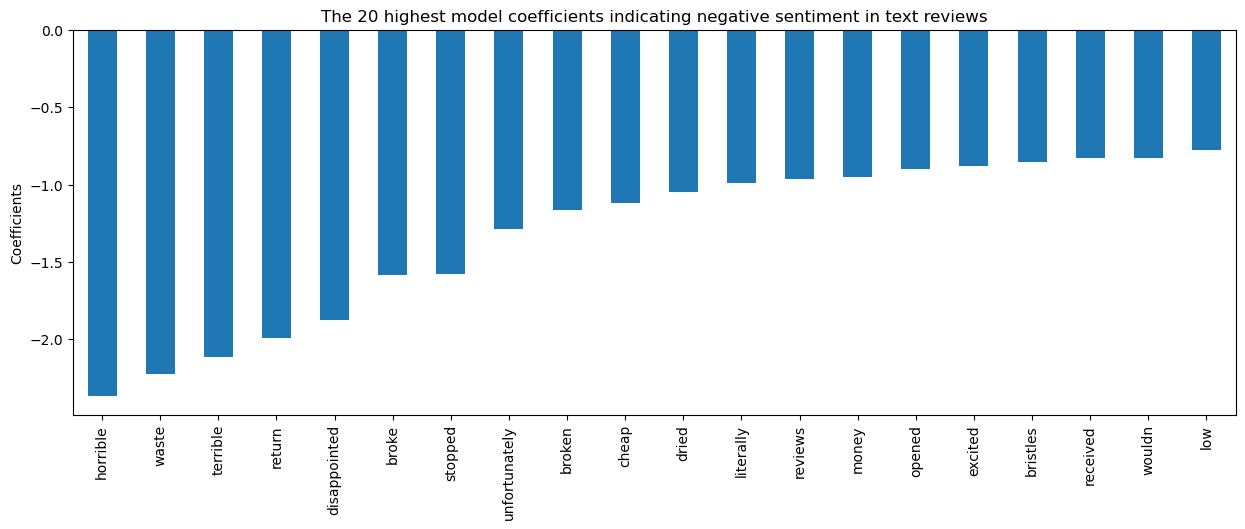

In [104]:
word_counts = pd.DataFrame(
    {"coefficients": text_logreg_CV.coef_[0]},
    index=bagofwords_X2_train.get_feature_names_out()
).sort_values("coefficients", ascending=True)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating negative sentiment in text reviews")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

In [106]:
#Assessing the reviews that contain horrible and only verified_purchase to remove potential fake reviews 
X2_train[(X2_train["text"].str.contains("horrible")) & (X2_train["verified_purchase"] == True)] 

,user_id,rating,title_x,text,sentiment,timestamp,verified_purchase,helpful_vote,parent_asin,average_rating,price,rating_number,year,month,week_of_year
147135,AEJIS4EEVC7H7EAOO7EGPUQEEIXQ,1,Smells horrible!,This was bought for a skin care routine. Howev...,0,1659480409354,True,0,B09NMFXX6Y,4.4,52.99,12055,2022,8,31
133064,AGDN3EY2DLO6DCTBVWYRMFWBK3FQ,1,Worst spray tan ever!,Worst tan spray ever!! Ive been using spray ta...,0,1602776770740,True,0,B00283SN92,4.3,32.98,1524,2020,10,42
23622,AHDGEOKY7LMGCGF3C2RP6JKFQCMQ,5,Really Good Oil - Scent is fine,The feel to the oil is a real winner. I have a...,1,1644209625384,True,0,B01FWB4Z66,4.6,19.77,4130,2022,2,6
129929,AGVS322QFGIUBM2FHQGTUMBXX4BA,1,It is completely fake!!!!,OMG I wasted my money!!!! They say that it is ...,0,1626860428607,True,1,B0714DWDVC,4.0,65.99,586,2021,7,29
79984,AGDF3F7OXVUZLHO7GX3BCA3I5DGA,1,The hair had a very bad smell.,I didn’t like the fact the the hair had a horr...,0,1624848121056,True,1,B07L471ZV6,3.3,28.99,4,2021,6,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80623,AF3VQZXXKYJGOQ3PEA4I3SKRNMWQ,3,color difference: brick &morter vs online,I loved this product and when I found it diffi...,1,1402546285000,True,2,B01MS00GZD,4.2,29.99,191,2014,6,24
89045,AGJG647D6QYXA67DQ57MREYBYTSQ,3,okay product,The print is so tiny on the bottle I cannot re...,1,1640589911189,True,2,B09TWJCRPV,4.5,4.50,49719,2021,12,52
40774,AHNCGM7HPSMSI7MVJN7EZKDK7WDQ,1,not so good,These do not fit well and horrible to take off.,0,1591591844469,True,0,B08XMF7P34,3.6,6.66,129,2020,6,24
12185,AH5BP6PCHD7DCNGU3ZGCS2ZSQOQA,2,Not For Me,I was excited to try this foundation based on ...,0,1583207164181,True,1,B0B65T2CTY,4.3,14.99,18169,2020,3,10


In [108]:
filtered_neg_df = X2_train[(X2_train["text"].str.contains("horrible")) & (X2_train["verified_purchase"] == True)][["text", "verified_purchase"]] 

In [110]:
filtered_neg_df #get insights on what is being said negatively about the products

,text,verified_purchase
147135,This was bought for a skin care routine. Howev...,True
133064,Worst tan spray ever!! Ive been using spray ta...,True
23622,The feel to the oil is a real winner. I have a...,True
129929,OMG I wasted my money!!!! They say that it is ...,True
79984,I didn’t like the fact the the hair had a horr...,True
...,...,...
80623,I loved this product and when I found it diffi...,True
89045,The print is so tiny on the bottle I cannot re...,True
40774,These do not fit well and horrible to take off.,True
12185,I was excited to try this foundation based on ...,True


In [112]:
#Data already test, split from the CV transformed set 
#1. X2_train_transformed, y2_train
#2. X2_test_transformed, y2_test

from sklearn.ensemble import RandomForestClassifier

rf_model_CV = RandomForestClassifier() 

rf_model_CV.fit(X2_train_transformed, y2_train)

print("Test Set Scores:")
print(f"Random Forest score: {rf_model_CV.score(X2_test_transformed, y2_test)}")

Test Set Scores:
Random Forest score: 0.8704089331522559


In [116]:
#Get AUC score per RandomForestClassifier:
from sklearn.metrics import roc_auc_score

# Assuming you have a trained model (rf_model_CV) and test data (X2_test, y2_test)

# Get the predicted probabilities for the positive class
y_pred_proba_rf_model_CV= rf_model_CV.predict_proba(X2_test_transformed)[:, 1]

# Calculate the AUC score
auc_score_rf_model_CV = roc_auc_score(y2_test, y_pred_proba_rf_model_CV)

print("AUC Score RandomForestClassifier_CV:", auc_score_rf_model_CV)

AUC Score RandomForestClassifier_CV: 0.8801614797474506


In [118]:
#Data already test, split from the CV transformed set 
#1. X2_train_transformed, y2_train
#2. X2_test_transformed, y2_test

from xgboost import XGBClassifier

xgb_model_CV = XGBClassifier()

xgb_model_CV.fit(X2_train_transformed, y2_train)

print("Test Set Scores:")
print(f"XG Boost score: {xgb_model_CV.score(X2_test_transformed, y2_test)}")

Test Set Scores:
XG Boost score: 0.871465218047382


In [120]:
#Get AUC score per XGBClassifier:
from sklearn.metrics import roc_auc_score

# Assuming you have a trained model (xgb_model_CV) and test data (X2_test, y2_test)

# Get the predicted probabilities for the positive class
y_pred_proba_xgb_model_CV= xgb_model_CV.predict_proba(X2_test_transformed)[:, 1]

# Calculate the AUC score
auc_score_xgb_model_CV = roc_auc_score(y2_test, y_pred_proba_xgb_model_CV)

print("AUC Score XGBClassifier_CV:", auc_score_xgb_model_CV)

AUC Score XGBClassifier_CV: 0.8940844430616502


In [122]:
import pickle

#xgb_model_CV.fit(X2_train_transformed, y2_train)

with open('xgb_model_CV.pkl', 'wb') as file:
    pickle.dump(xgb_model_CV, file)

In [124]:
import pickle

#rf_model_CV.fit(X2_train_transformed, y2_train)

with open('rf_model_CV.pkl', 'wb') as file:
    pickle.dump(rf_model_CV, file)

In [126]:
import pickle

#text_logreg_CV.fit(X2_train_transformed, y2_train) #Logistic Regression Model

with open('text_logreg_CV.pkl', 'wb') as file:
    pickle.dump(text_logreg_CV, file)

**Repeat CV preprocessing with the focus on 2 ngrams (two word phrases) for more context.**

In [226]:
X6 = data_subset_CV[['user_id', 'rating', 'title_x', 'text', 'sentiment', 'timestamp', 'verified_purchase', 'helpful_vote', 'parent_asin', 'average_rating', 'price', 'rating_number', 'year', 'month', 'week_of_year']]
y6 = data_subset_CV['sentiment'] # target variable

In [228]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.20, random_state=42)

In [230]:
X6_train.shape

(132539, 15)

In [232]:
y6_train.shape

(132539,)

In [234]:
X6_test.shape

(33135, 15)

In [236]:
y6_test.shape

(33135,)

In [238]:
# 1. Instantiate 
bagofwords_X6_train = CountVectorizer(max_features=500, min_df=1, stop_words='english', ngram_range=(2,2))

# 2. Fit 
bagofwords_X6_train.fit(X6_train['text'])

# 3. Transform
X6_train_transformed = bagofwords_X6_train.transform(X6_train['text'])
X6_train_transformed

<132539x500 sparse matrix of type '<class 'numpy.int64'>'
	with 170991 stored elements in Compressed Sparse Row format>

In [242]:
bagofwords_X6_train.get_feature_names_out()

array(['10 10', '10 minutes', '10 years', 'able use', 'absolutely love',
       'acne prone', 'actually works', 'amazing product', 'argan oil',
       'arrived time', 'awesome product', 'bar soap', 'base coat',
       'bath bombs', 'battery life', 'beard oil', 'beautiful color',
       'best hair', 'best product', 'best ve', 'blonde hair', 'blow dry',
       'blow dryer', 'blow drying', 'body wash', 'bought product',
       'br br', 'br cons', 'br don', 'br good', 'br great', 'br hair',
       'br just', 'br like', 'br love', 'br overall', 'br product',
       'br really', 'br recommend', 'br update', 'br use', 'br used',
       'br ve', 'brand new', 'brush hair', 'buy product', 'close shave',
       'coconut oil', 'color hair', 'continue use', 'couple days',
       'couple times', 'couple weeks', 'curl hair', 'curling iron',
       'curly hair', 'customer service', 'cut hair', 'dark brown',
       'dark circles', 'daughter loves', 'day long', 'dead skin',
       'decided try', 'defini

In [244]:
X6_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [247]:
X6_train_transformed_df = pd.DataFrame(
    data=X6_train_transformed.toarray(),
    columns=bagofwords_X6_train.get_feature_names_out()
)
X6_train_transformed_df

,10 10,10 minutes,10 years,able use,absolutely love,acne prone,actually works,amazing product,argan oil,arrived time,...,works perfectly,works really,worth money,worth penny,worth price,wouldn recommend,year old,years ago,years love,years old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
X6_test_transformed = bagofwords_X6_train.transform(X6_test['text'])
X6_test_transformed

<33135x500 sparse matrix of type '<class 'numpy.int64'>'
	with 42328 stored elements in Compressed Sparse Row format>

In [251]:
X6_test_transformed_df = pd.DataFrame(
    data=X6_test_transformed.toarray(),
    columns=bagofwords_X6_train.get_feature_names_out()
)
X6_test_transformed_df

,10 10,10 minutes,10 years,able use,absolutely love,acne prone,actually works,amazing product,argan oil,arrived time,...,works perfectly,works really,worth money,worth penny,worth price,wouldn recommend,year old,years ago,years love,years old
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Notes on the names of the train, test set from CountVectorizer Preprocessing with ngram=2:**
1. X6_train_transformed, y6_train
2. X6_test_transformed, y6_test

In [254]:
from sklearn.linear_model import LogisticRegression

#Instantiate model
text_logreg_CV6 = LogisticRegression(C=0.5, penalty=None)

#Fitting the model 
text_logreg_CV6.fit(X6_train_transformed, y6_train)

LogisticRegression(C=0.5, penalty=None)

In [256]:
#Score the model
print(f'Score on train: {text_logreg_CV6.score(X6_train_transformed, y6_train)}')
print(f'Score on test: {text_logreg_CV6.score(X6_test_transformed, y6_test)}')

Score on train: 0.8509042621417092
Score on test: 0.8484985664704995


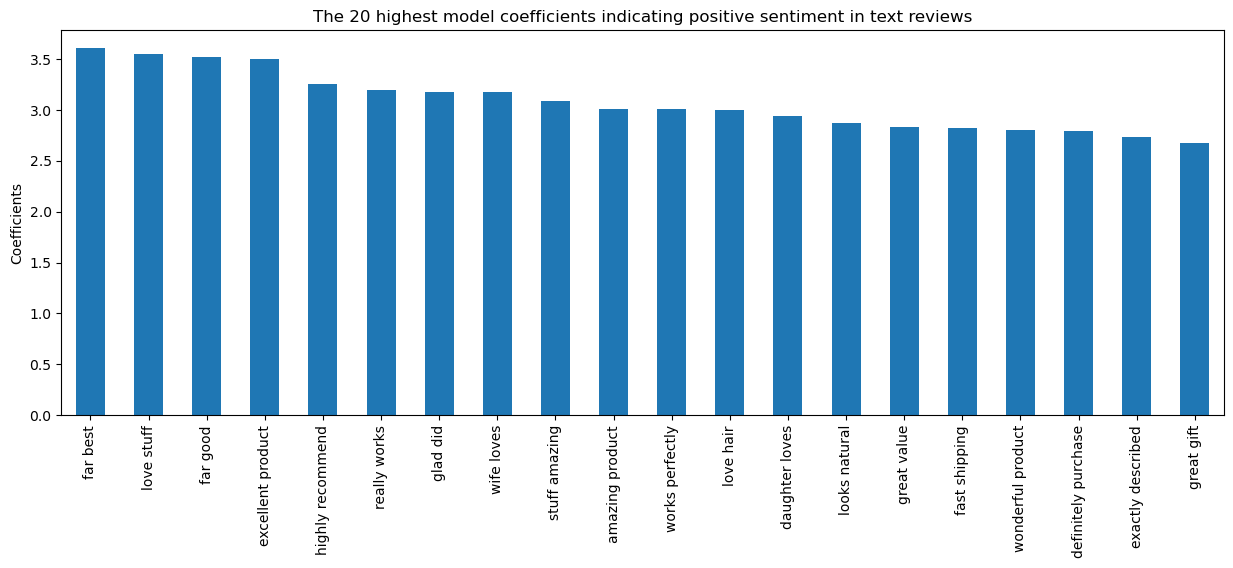

In [258]:
word_counts = pd.DataFrame(
    {"coefficients": text_logreg_CV6.coef_[0]},
    index=bagofwords_X6_train.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment in text reviews")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

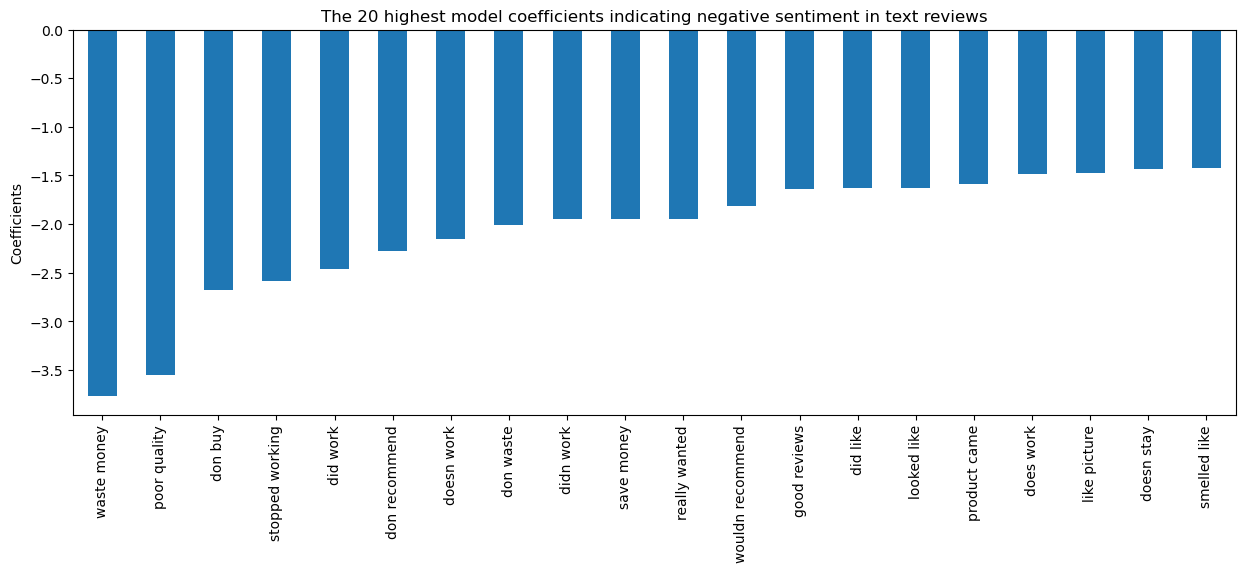

In [263]:
word_counts = pd.DataFrame(
    {"coefficients": text_logreg_CV6.coef_[0]},
    index=bagofwords_X6_train.get_feature_names_out()
).sort_values("coefficients", ascending=True)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating negative sentiment in text reviews")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

Though ngram=2 provides a bit more context of the customer's sentiment, it is still difficult to extract product insights as to why they like or dislike a specific product. Given that TFIDF with SVD and embedding transformation using the Sentence Transformer (‘all-MiniLM-L6-v2’, 384 dimensions) reduce interceptability, preprocessing with CountVectorizer was included as an alternative option if Review Analyzer toolkit was not utilized. 


**11. Text Analysis - Preprocessing using TFIDF with SVD and Modeling with Logistic Regression, XBoost and Random Forest**

In [134]:
data_subset_tfidf = pd.read_csv('AmazonBP_all_selected_01subset.csv')

In [136]:
data_subset_CV.shape

(165674, 16)

In [168]:
X4 = data_subset_tfidf[['user_id', 'rating', 'title_x', 'text', 'sentiment', 'timestamp', 'verified_purchase', 'helpful_vote', 'parent_asin', 'average_rating', 'price', 'rating_number', 'year', 'month', 'week_of_year']]
y4 = data_subset_tfidf['sentiment'] # target variable

In [170]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=42)

In [172]:
X4_train.shape #checking the shape to ensure the 80% training data set is matched for X_train and y_train

(132539, 15)

In [174]:
y4_train.shape

(132539,)

In [176]:
X4_test.shape #checking the shape to ensure the 20% testing data set is matched for X_test and y_test

(33135, 15)

In [178]:
y4_test.shape

(33135,)

In [180]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from nltk.corpus import stopwords
import re

# Define a custom tokenizer function
def custom_tokenizer(text):
    # lowercase the text
    text = text.lower()
    
    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)

    # split into words as tokens
    tokens = text.split()

    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    for token in tokens:
        token = stemmer.stem(lemmatizer.lemmatize(token))

    return tokens 

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD #dimensionality reduction similar to PCA

In [184]:
#TF-IDF transformer
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(tokenizer=custom_tokenizer, stop_words="english", max_features=1000, min_df=10)),
    ("svd", TruncatedSVD(n_components=10))
])

Since this will create a large sparse matrix, we reduced the components using SVD, similar to PCA. However, the trade off is the interpretability of the data given that the columns will to transformed to 10 columns with numerical values.

In [186]:
#Fit to the pipeline
pipeline.fit(X4_train["text"])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000, min_df=10,
                                 stop_words='english',
                                 tokenizer=<function custom_tokenizer at 0x394e04fe0>)),
                ('svd', TruncatedSVD(n_components=10))])

In [188]:
#Transform 
X4_train_tfidf_transformed = pipeline.transform(X4_train["text"])

In [190]:
#Convert the array to dataframe
X4_train_tfidf_transformed_df = pd.DataFrame(
    data=X4_train_tfidf_transformed, 
    columns=[f"svd_{i}" for i in range(X4_train_tfidf_transformed.shape[1])]
)

X4_train_tfidf_transformed_df

,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9
0,0.006456,0.000140,-0.002173,0.000607,0.003186,-0.008352,-0.005589,-0.009580,-0.002555,0.002475
1,0.247311,-0.066950,-0.285406,0.030243,-0.099667,0.001940,-0.027091,-0.142820,-0.141920,-0.124367
2,0.207752,-0.059795,-0.080261,-0.027639,0.287072,-0.009050,0.039047,-0.222578,-0.222364,-0.189833
3,0.082359,-0.004522,-0.051779,-0.045594,0.012355,-0.029070,-0.033544,-0.011446,-0.011333,0.048218
4,0.256066,-0.067844,-0.104070,-0.184325,-0.078213,-0.027251,0.031593,0.089237,0.037318,0.076162
...,...,...,...,...,...,...,...,...,...,...
132534,0.106633,-0.008930,-0.079750,-0.081020,0.048607,-0.019947,-0.002267,-0.025004,0.136460,-0.020894
132535,0.101170,-0.031657,-0.132454,0.166707,-0.056992,-0.032684,-0.033742,-0.004251,-0.024215,0.043457
132536,0.295231,-0.169858,0.170574,0.072563,0.272905,0.171881,0.046139,-0.011333,0.199131,-0.011213
132537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [192]:
X4_test_tfidf_transformed = pipeline.transform(X4_test["text"])

**Notes on the names of the train, test set from TFIDF w/ SVD Preprocessing:**
1. X4_train_tfidf_transformed, y4_train
2. X4_test_tfidf_transformed, y4_test

In [197]:
from sklearn.linear_model import LogisticRegression

#Instantiate model
text_logreg_tfidf = LogisticRegression(C=0.5, penalty=None)

#Fitting the model 
text_logreg_tfidf.fit(X4_train_tfidf_transformed, y4_train)

LogisticRegression(C=0.5, penalty=None)

In [199]:
#Score the model
print(f'Score on train: {text_logreg_tfidf.score(X4_train_tfidf_transformed, y4_train)}')
print(f'Score on test: {text_logreg_tfidf.score(X4_test_tfidf_transformed, y4_test)}')

Score on train: 0.8291144493318947
Score on test: 0.8255620944620492


The training and test score are very similar, at ~83%, which are solid accuracy scores and it shows that the model is not overfitted. 

In [204]:
#Get AUC score for Log Regression_tfidf:
from sklearn.metrics import roc_auc_score

# Assuming you have a trained model (text_logreg_tfidf) and test data (X4_test, y4_test)

# Get the predicted probabilities for the positive class
y4_pred_proba_logreg_tfidf= text_logreg_tfidf.predict_proba(X4_test_tfidf_transformed)[:, 1]

# Calculate the AUC score
auc_score_logreg_tfidf = roc_auc_score(y4_test, y4_pred_proba_logreg_tfidf)

print("AUC Score Log Reg_tfidf:", auc_score_logreg_tfidf)

AUC Score Log Reg_tfidf: 0.7607780517801095


In [206]:
#Data already test, split from the TFIDF transformed set 
#1.X4_train_tfidf_transformed, y4_train
#2.X4_test_tfidf_transformed, y4_test

from sklearn.ensemble import RandomForestClassifier

rf_model_tfidf = RandomForestClassifier() 

rf_model_tfidf.fit(X4_train_tfidf_transformed, y4_train)

print("Test Set Scores:")
print(f"Random Forest score: {rf_model_tfidf.score(X4_test_tfidf_transformed, y4_test)}")

Test Set Scores:
Random Forest score: 0.8470801267541874


In [208]:
#Get AUC score per RandomForestClassifier:
from sklearn.metrics import roc_auc_score

# Assuming you have a trained model (rf_model_tfidf) and test data (X4_test, y4_test)

# Get the predicted probabilities for the positive class
y_pred_proba_rf_model_tfidf= rf_model_tfidf.predict_proba(X4_test_tfidf_transformed)[:, 1]

# Calculate the AUC score
auc_score_rf_model_tfidf = roc_auc_score(y4_test, y_pred_proba_rf_model_tfidf)

print("AUC Score RandomForestClassifier_tfidf:", auc_score_rf_model_tfidf)

AUC Score RandomForestClassifier_tfidf: 0.8222292342775526


In [210]:
#Data already test, split from the tfidf transformed set 
#1.X4_train_tfidf_transformed, y4_train
#2.X4_test_tfidf_transformed, y4_test

from xgboost import XGBClassifier

xgb_model_tfidf = XGBClassifier()

xgb_model_tfidf.fit(X4_train_tfidf_transformed, y4_train)

print("Test Set Scores:")
print(f"XG Boost score: {xgb_model_tfidf.score(X4_test_tfidf_transformed, y4_test)}")

Test Set Scores:
XG Boost score: 0.8467179719330014


In [212]:
#Get AUC score per XGBClassifier:
from sklearn.metrics import roc_auc_score

# Assuming you have a trained model (xgb_model_tfidf) and test data (X4_test, y4_test)

# Get the predicted probabilities for the positive class
y_pred_proba_xgb_model_tfidf= xgb_model_tfidf.predict_proba(X4_test_tfidf_transformed)[:, 1]

# Calculate the AUC score
auc_score_xgb_model_tfidf = roc_auc_score(y4_test, y_pred_proba_xgb_model_tfidf)

print("AUC Score XGBClassifier_tfidf:", auc_score_xgb_model_tfidf)

AUC Score XGBClassifier_tfidf: 0.8299771046713672


In [214]:
import pickle

#xgb_model_tfidf.fit(X4_train_tfidf_transformed, y4_train)

with open('xgb_model_tfidf.pkl', 'wb') as file:
    pickle.dump(xgb_model_tfidf, file)

In [216]:
import pickle

#rf_model_tfidf.fit(X4_train_tfidf_transformed, y4_train)

with open('rf_model_tfidf.pkl', 'wb') as file:
    pickle.dump(rf_model_tfidf, file)

In [218]:
import pickle

#text_logreg_tfidf.fit(X4_train_tfidf_transformed, y4_train)

with open('text_logreg_tfidf.pkl', 'wb') as file:
    pickle.dump(text_logreg_tfidf, file)